#**Introduction**

In [0]:
import numpy as np
import pandas as pd

In [0]:
spam = pd.read_csv('spam.csv')

In [0]:
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Le but** de cette démonstration est d'appliquer les principaux fonctionalités de Natural Language Processing, il s'agit de lemmentazing and stemming, on va travailler sur un DataSet des émails composé de deux columns:


1.   Category: les types de messages soit ("ham"/"spam")
2.   Message: message écrit sur l'email

Après, on va essayer de prédire la catégorie de chaque message, à l'aide des algorithmes de classifications

In [0]:
# Installer les librairies nécessaires pour cette étude:

!pip install nltk

import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# **1- Suppression des stopwords de tous les messages**

In [0]:

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
# Assign the messages without stopwords to another column
spam['Message_without_stopwords'] = spam.Message.apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

In [0]:
spam['Message_with_stopwords'] = spam.Message

In [0]:
spam.drop(columns=['Message'],inplace=True)

# **2- Application du stemming sur les messages sans stopwords**

In [0]:
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

stemmer = SnowballStemmer('english')
spam['Message_stemmed_without_StopWords'] = spam.Message_without_stopwords.apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

# **3- Application de la lematization sur les messages sans stopwords (mais pas après stemming)**

In [0]:
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()
spam['Message_lemmatized_before_stemming'] = spam.Message_without_stopwords.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

# **4- Comparation des résultats entre 2 et 3 (2-3 phrases suffisent)**

In [0]:
# show the totality of message in our dataSet
pd.set_option('display.max_colwidth', -1)

In [0]:
spam[['Message_without_stopwords','Message_stemmed_without_StopWords','Message_lemmatized_before_stemming']].head(10)

,Message_without_stopwords,Message_stemmed_without_StopWords,Message_lemmatized_before_stemming
0,"Go jurong point , crazy.. Available bugis n great world la e buffet ... Cine got amore wat ...","go jurong point , crazy.. avail bugi n great world la e buffet ... cine got amor wat ...","Go jurong point , crazy.. Available bugis n great world la e buffet ... Cine got amore wat ..."
1,Ok lar ... Joking wif u oni ...,ok lar ... joke wif u oni ...,Ok lar ... Joking wif u oni ...
2,Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 . Text FA 87121 receive entry question ( std txt rate ) T & C 's apply 08452810075over18 's,free entri 2 wkli comp win fa cup final tkts 21st may 2005 . text fa 87121 receiv entri question ( std txt rate ) t & c 's appli 08452810075over18 's,Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 . Text FA 87121 receive entry question ( std txt rate ) T & C 's apply 08452810075over18 's
3,U dun say early hor ... U c already say ...,u dun say earli hor ... u c alreadi say ...,U dun say early hor ... U c already say ...
4,"Nah I n't think goes usf , lives around though","nah i n't think goe usf , live around though","Nah I n't think go usf , life around though"
5,"FreeMsg Hey darling 's 3 week 's word back ! I 'd like fun still ? Tb ok ! XxX std chgs send , £1.50 rcv","freemsg hey darl 's 3 week 's word back ! i 'd like fun still ? tb ok ! xxx std chgs send , £1.50 rcv","FreeMsg Hey darling 's 3 week 's word back ! I 'd like fun still ? Tb ok ! XxX std chgs send , £1.50 rcv"
6,Even brother like speak . They treat like aids patent .,even brother like speak . they treat like aid patent .,Even brother like speak . They treat like aid patent .
7,As per request 'Melle Melle ( Oru Minnaminunginte Nurungu Vettam ) ' set callertune Callers . Press *9 copy friends Callertune,as per request mell mell ( oru minnaminungint nurungu vettam ) ' set callertun caller . press *9 copi friend callertun,As per request 'Melle Melle ( Oru Minnaminunginte Nurungu Vettam ) ' set callertune Callers . Press *9 copy friend Callertune
8,WINNER ! ! As valued network customer selected receivea £900 prize reward ! To claim call 09061701461 . Claim code KL341 . Valid 12 hours .,winner ! ! as valu network custom select receivea £900 prize reward ! to claim call 09061701461 . claim code kl341 . valid 12 hour .,WINNER ! ! As valued network customer selected receivea £900 prize reward ! To claim call 09061701461 . Claim code KL341 . Valid 12 hour .
9,Had mobile 11 months ? U R entitled Update latest colour mobiles camera Free ! Call The Mobile Update Co FREE 08002986030,had mobil 11 month ? u r entitl updat latest colour mobil camera free ! call the mobil updat co free 08002986030,Had mobile 11 month ? U R entitled Update latest colour mobile camera Free ! Call The Mobile Update Co FREE 08002986030


If we look to phrase **'Had mobile 11 months ? U R entitled Update latest colour mobiles camera Free ! Call The Mobile Update Co FREE 08002986030'** specially verb *"entitled"* it is in the past simple, so normally when we stemmed we should have ***'entitle'*** but the result has ***'entitl'*** even the lemmatized he keeped the ***"ed"***. The same thing applies to message  **'WINNER ! ! As valued network customer selected receivea £900 prize reward ! To claim call 09061701461 . Claim code KL341 . Valid 12 hours .	"** with the verbs "select, value"

#  **<font color="blue">5- Exécutez une TF-IDF sur les messages après Stemming ou Lemmatization<font/>**



*   **sublinear_df** est mis on True pour utiliser la forme logarithmique de la fréquence.
*   **min_df** est le nombre minimum de documents dans lesquels un mot doit être présent pour être conservé.
*   **norm is** est mis en "l2", pour garantir que tous nos vecteurs de caractéristiques ont une norme euclidienne de 1.
*   **ngram_range** est réglé sur (1, 2) pour indiquer que nous voulons considérer à la fois les unigrammes (un mot) et les bigrammes (deux mots).

Pour plus de détails, voir: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html








## 5.1. Le cas du Lemmatizing

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus_lemm = spam.Message_lemmatized_before_stemming

#Initialisation du TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2',  ngram_range=(1, 2))

#transformation du message Lemmatizing
Y = vectorizer.fit_transform(corpus_lemm)

# on crée une dataFrame pour avoir les mots les plus fréquents et son TFIDF (ce fréquence est en pourcentage)
df2 = pd.DataFrame(np.round(Y[0].T.todense() *100,2), index=vectorizer.get_feature_names(), columns=["tfidf % - lemmatize"])
df2.sort_values(by=["tfidf % - lemmatize"],ascending=False)

,tfidf % - lemmatize
bugis,36.84
la,36.84
cine,36.84
crazy,33.77
available,32.62
...,...
friends,0.00
friendship,0.00
friendship good,0.00
frm,0.00


## 5.2. Le cas du Stemming

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus_stem = spam.Message_stemmed_without_StopWords

#Initialisation du TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2))

#transformation du message stemmé
X = vectorizer.fit_transform(corpus_stem)

# on crée une dataFrame pour avoir les mots les plus fréquents et son TFIDF (ce fréquence est en pourcentage)
df1 = pd.DataFrame(np.round(X[0].T.todense() *100,2), index=vectorizer.get_feature_names(), columns=["tfidf % - stemmed"])
df1.sort_values(by=["tfidf % - stemmed"],ascending=False)

,tfidf % - stemmed
la,39.31
bugi,39.31
cine,39.31
avail,35.38
point,31.77
...,...
friend callertun,0.00
friend repli,0.00
friends,0.00
friendship,0.00


# <font color="blue">**6 (Bonus): Lancez une classification pour détecter les *spams***</font>

In [0]:
spam.Category.value_counts()

ham     4825
spam    747 
Name: Category, dtype: int64

On remarque le nombre de message par catégorie est déséquilibré, il est biasé sur le ham que le spam

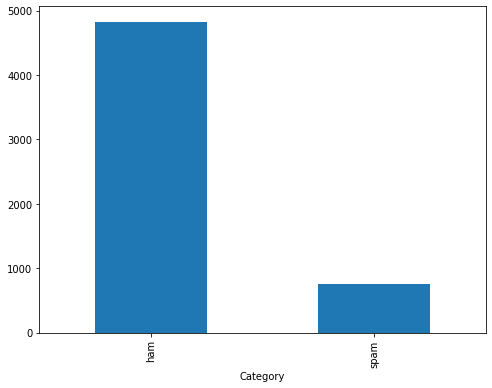

In [0]:
import matplotlib.pyplot as plt
spam.groupby('Category').Message_with_stopwords.count().plot.bar(ylim=0,figsize=(8,6))

## 6.1. Le cas du stemming

On créer le column category_id pour assigner chaque catégorie un ID, et aussi supprimer les messages dupliqués

In [0]:
spam['category_id'] = spam.Category.factorize()[0]
category_id_df = spam[['Category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

Création de dataframe spécifique au message stémmer

In [0]:
col = ['Category', 'Message_stemmed_without_StopWords','category_id']
df_stem = spam[col]

In [0]:
df_stem.head()

,Category,Message_stemmed_without_StopWords,category_id
0,ham,"go jurong point , crazy.. avail bugi n great world la e buffet ... cine got amor wat ...",0
1,ham,ok lar ... joke wif u oni ...,0
2,spam,free entri 2 wkli comp win fa cup final tkts 21st may 2005 . text fa 87121 receiv entri question ( std txt rate ) t & c 's appli 08452810075over18 's,1
3,ham,u dun say earli hor ... u c alreadi say ...,0
4,ham,"nah i n't think goe usf , live around though",0


Maintenant, chacun des 5572 messages stemmés est représenté par 2534 fonctionnalités, représentant le score tf-idf pour différents unigrammes et bigrammes

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus_stem = spam.Message_stemmed_without_StopWords
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2))
featuresStem = vectorizer.fit_transform(corpus_stem).toarray()
labels = df_stem.category_id
featuresStem.shape

(5572, 2534)

### 6.1.1. Classification à l'aide du Naive bayes

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df_stem['Message_stemmed_without_StopWords'], df_stem['Category'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)
y_pred = clf.predict(count_vect.transform(X_test))

In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df_stem['Category'].unique()))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.89      0.94       185

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [0]:
print(clf.predict(count_vect.transform(["Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 . Text FA 87121 receive entry question ( std txt rate ) T & C 's apply 08452810075over18 's"])))

['spam']


In [0]:
print(clf.predict(count_vect.transform(["Nah I n't think go usf , life around though"])))

['ham']


On remarque, il y a 22 messages qui a été confusioner (21 spam, 1 ham)

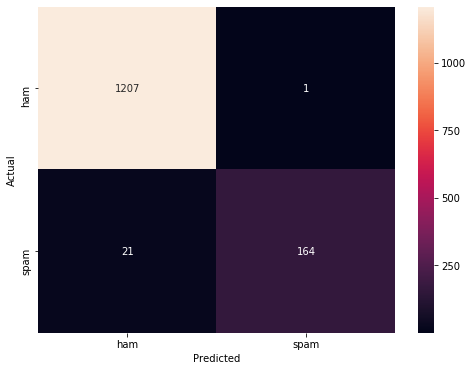

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 6.1.2. Classification par Linear SVC (svm)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(featuresStem, labels, df_stem.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

On remarque le f1-score du LinearSVC est améliorer comparant au Naive Bayes

In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df_stem['Category'].unique()))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1597
        spam       0.99      0.93      0.96       242

    accuracy                           0.99      1839
   macro avg       0.99      0.96      0.98      1839
weighted avg       0.99      0.99      0.99      1839



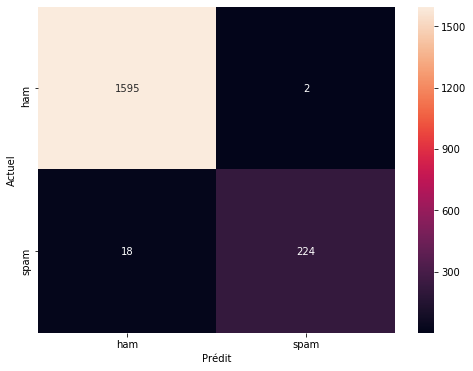

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actuel')
plt.xlabel('Prédit')
plt.show()

On remarque un petit peu d'amélioration, alors SVM est un bon choix pour ce cas de dataSet 

In [0]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' est prédit comme '{}' : {} exemples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df_stem.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Category', 'Message_stemmed_without_StopWords']])
      print('')

'spam' est prédit comme 'ham' : 18 exemples.


,Category,Message_stemmed_without_StopWords
684,spam,hi i 'm sue . i 20 year old work lapdanc . i love sex . text live - i 'm bedroom . text sue 89555 . by textoper g2 1da 150ppmsg 18+
731,spam,email alertfrom : jeri stewarts : 2kbsubject : low-cost prescripiton drvgsto listen email call 123
1940,spam,more peopl dog area . call 09090204448 join like mind guy . whi arrang 1 . there 's 1 even . a£1.50 minapn ls278bb
751,spam,"do realiz 40 year , ll thousand old ladi run around tattoo ?"
4213,spam,miss call alert . these number call left messag . 07008009200
4298,spam,thesmszone.com let send free anonym mask messages..im send messag there..do see potenti abus ? ? ?
5466,spam,http//tms . widelive.com/index . wml ? id=820554ad0a1705572711 & first=true¡c c ringtone¡
333,spam,call germani 1 penc per minut ! call fix line via access number 0844 861 85 85 . no prepay . direct access !
3864,spam,"oh god ! i ve found number ! i 'm glad , text back xafter msgs cst std ntwk chg £1.50"
5449,spam,"latest news ! polic station toilet stolen , cop noth go !"



## 6.2. Le cas du Lemmatization

Création de dataframe spécifique au message Lemmatizé

In [0]:
col = ['Category', 'Message_lemmatized_before_stemming','category_id']
df_lem = spam[col]

In [0]:
df_lem.head()

,Category,Message_lemmatized_before_stemming,category_id
0,ham,"Go jurong point , crazy.. Available bugis n great world la e buffet ... Cine got amore wat ...",0
1,ham,Ok lar ... Joking wif u oni ...,0
2,spam,Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 . Text FA 87121 receive entry question ( std txt rate ) T & C 's apply 08452810075over18 's,1
3,ham,U dun say early hor ... U c already say ...,0
4,ham,"Nah I n't think go usf , life around though",0


Maintenant, chacun des 5572 messages Lemmatizés est représenté par 2534 fonctionnalités, représentant le score tf-idf pour différents unigrammes et bigrammes

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus_stem = df_lem.Message_lemmatized_before_stemming
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2))
featuresLem = vectorizer.fit_transform(corpus_stem).toarray()
labels = df_lem.category_id
featuresLem.shape

(5572, 2566)

#### 6.2.1. Classification à l'aide du Naive bayes

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df_lem['Message_lemmatized_before_stemming'], df_lem['Category'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)
y_pred = clf.predict(count_vect.transform(X_test))

#####6.2.1.1. F1-Score

In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df_lem['Category'].unique()))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       1.00      0.88      0.94       185

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [0]:
print(clf.predict(count_vect.transform(["Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 . Text FA 87121 receive entry question ( std txt rate ) T & C 's apply 08452810075over18 's"])))

['spam']


In [0]:
print(clf.predict(count_vect.transform(["Nah I n't think go usf , life around though"])))

['ham']


On remarque, il y a 22 messages qui a été confusioner (22 ham comme  spam, 0 spam comme ham)

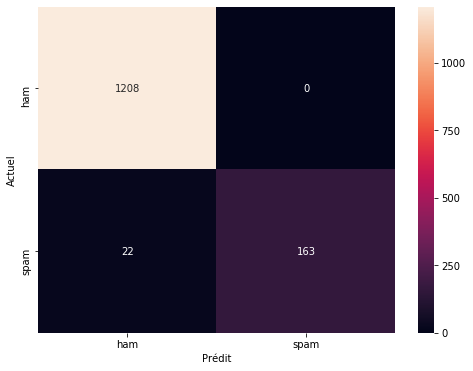

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actuel')
plt.xlabel('Prédit')
plt.show()

#### 6.2.2. Classification par Linear SVC (svm)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(featuresLem, labels, df_lem.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

On remarque le f1-score du LinearSVC est améliorer comparant au Naive Bayes

#####6.2.2.1 f1-score

In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df_stem['Category'].unique()))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1597
        spam       1.00      0.93      0.96       242

    accuracy                           0.99      1839
   macro avg       0.99      0.96      0.98      1839
weighted avg       0.99      0.99      0.99      1839



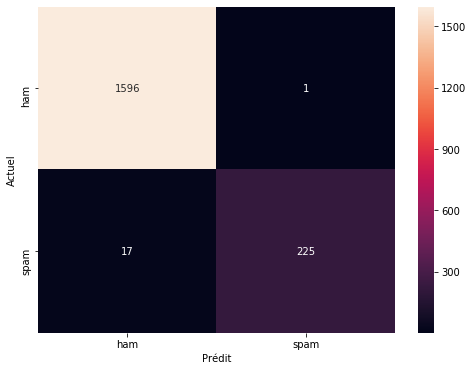

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actuel')
plt.xlabel('Prédit')
plt.show()

On remarque un petit peu d'amélioration, alors SVM est un bon choix pour ce cas de dataSet 

In [0]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' est prédit comme '{}' : {} exemples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df_lem.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Category', 'Message_lemmatized_before_stemming']])
      print('')

'spam' est prédit comme 'ham' : 17 exemples.


,Category,Message_lemmatized_before_stemming
684,spam,Hi I 'm sue . I 20 year old work lapdancer . I love sex . Text live - I 'm bedroom . text SUE 89555 . By TextOperator G2 1DA 150ppmsg 18+
731,spam,Email AlertFrom : Jeri StewartSize : 2KBSubject : Low-cost prescripiton drvgsTo listen email call 123
1940,spam,More people dogging area . Call 09090204448 join like minded guy . Why arrange 1 . There 's 1 evening . A£1.50 minAPN LS278BB
751,spam,"Do realize 40 year , 'll thousand old lady running around tattoo ?"
4213,spam,Missed call alert . These number called left message . 07008009200
4298,spam,thesmszone.com let send free anonymous masked messages..im sending message there..do see potential abuse ? ? ?
333,spam,Call Germany 1 penny per minute ! Call fixed line via access number 0844 861 85 85 . No prepayment . Direct access !
3864,spam,"Oh god ! I 've found number ! I 'm glad , text back xafter msg cst std ntwk chg £1.50"
5449,spam,"Latest News ! Police station toilet stolen , cop nothing go !"
1430,spam,For sale - arsenal dartboard . Good condition double treble !
